# Глубинное обучение 1 / Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 3: RNN и языковые модели 

### Общая информация

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{\text{penalty}} = M_{\text{full}} \cdot 0.85^{t/1440}$, где $M_{\text{full}}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 12.75, а если сдать через четыре дня после мягкого дедлайна, то ваш максимум — 7.83 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 15 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит обучить рекуррентную нейронную сеть для задачи генерации текстов. В качестве данных возьмем набор из 120 тысяч анекдотов (всех категорий от А до Я включительно). Его вы можете найти в архиве `jokes.txt.zip`, который доступен по [ссылке](https://disk.yandex.com/d/fjt5xICH-ukEEA).

In [1]:
%load_ext autoreload
%autoreload 2

## Задание 1: Dataset (1 балл)

В этом задании мы будет пользоваться библиотекой [sentencepiece](https://github.com/google/sentencepiece), которая поддерживает разные форматы токенизации текстов, в том числе BPE, который мы и будем использовать. Реализуйте недостающие фрагменты кода в классе `TextDataset` в файле `dataset.py`. Датасет обучает sentencepiece токенизатор, токенизирует тексты, превращает токены в индексы и паддит до одной и той же длины (параметр `max_length`). Не забудьте, что для генерации текстов нам будут нужны специальные токены начала и конца последовательности, соответственно `BOS` и `EOS`. Существуют еще два специальных токена &mdash; паддинг `PAD` и токен `UNK`, заменяющий out-of-vocabulary токены.

In [2]:
%pip install sentencepiece
%pip install scikit-learn
%pip install seaborn
%pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 86.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 59.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 45.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 89.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 78.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [3]:
import torch
import numpy as np
from dataset import TextDataset
from random import shuffle 
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from model import LanguageModel
import torch.nn as nn
from torch.utils.data import DataLoader
from train import train

In [4]:
train_set = TextDataset(data_file='jokes.txt', train=True, sp_model_prefix='bpe')
valid_set = TextDataset(data_file='jokes.txt', train=False, sp_model_prefix='bpe')

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: jokes.txt
  input_format: 
  model_prefix: bpe
  model_type: BPE
  vocab_size: 2000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: 1488
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  differential_privacy_noise_level: 0
  differential_privacy_clipping_thresh

In [5]:
# Код должен проходить тесты
assert len(train_set) + len(valid_set) == 120759

for _ in range(5):
    for dataset in (train_set, valid_set):
        indices, length = dataset[np.random.randint(len(dataset))]
        assert indices.shape == (dataset.max_length, )
        assert indices[0].item() == dataset.bos_id
        assert (indices == dataset.eos_id).sum().item() == 1

        eos_pos = indices.tolist().index(dataset.eos_id)
        assert torch.all(indices[eos_pos + 1:] == dataset.pad_id)
        assert (indices != dataset.pad_id).sum() == length

## Задание 2 Language model (3.5 балла)

Реализуйте класс `LanguageModel` из файла `model.py`. Мы будем генерировать текст с помощью языковой модели &mdash; это авторегрессионная вероятностная модель, которая предсказывает распределение следующего токена при условии предыдущих:

$$
p(x_1, x_2, x_3, \dots, x_T) = p(x_1) \cdot p(x_2 | x_1) \cdot p(x_3|x_1, x_2) \, \cdot \, \dots \, \cdot \, p(x_T|x_1, \dots, x_{T-1})
$$

Мы будем реализовывать ее с помощью рекуррентной нейронной сети. Ваш код должен поддерживать возможность работать как с оригинальной [RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN), так и c [LSTM](https://bitly.com/98K8eH). На каждом временном шаге модель возвращает логиты вероятностей для следующего токена. Модель будет работать в двух режимах (не путать с `.train()` и `.eval()`):

- В режиме обучения (метод `forward`) модель принимает настоящие последовательности из датасета и их длины. На каждом временном шаге возвращаются логиты вероятностей следующего токена, что позволяет считать лосс, обучаться на трейне и валидироваться на валидации.

- В режиме генерации (инференса, метод `inference`) модель принимает некоторый префикс (возможно пустой), с которого начинать генерацию, и продолжает его. Для этого на каждом шаге генерируются новые логиты, семплируется новый токен (из распределения, заданного логитами), и процесс продолжается, пока не будет сгенерирован токен `UNK` или не будет достигнуто ограничение на длину последовательности. **Обратите внимание**, что вам не нужно прогонять всю последовательность заново через RNN после каждого нового токена, это приведет к квадратичной сложности по длине последовательности. Вам достаточно обновлять скрытое состояние, подавая на вход новый сгенерированный токен и предыдущее скрытое состояние. Кроме того, чтобы получить больше контроля над генерацией, вводится параметр температуры `temp`. Перед семплированием нужно разделить на него логиты, полученные моделью. 

In [6]:
from model import LanguageModel
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [7]:
model = LanguageModel(train_set).to(device)

In [8]:
# Код должен проходить тесты
for bs in [1, 4, 16, 64, 256]:
    indices = torch.randint(high=train_set.vocab_size, size=(bs, train_set.max_length))
    lengths = torch.randint(low=1, high=train_set.max_length + 1, size=(bs, ))
    logits = model(indices, lengths)
    assert logits.shape == (bs, lengths.max(), train_set.vocab_size)

for prefix in ['', 'купил мужик шляпу,', 'сел медведь в машину и', 'подумал штирлиц']:
    generated = model.inference(prefix, temp=np.random.uniform(0.1, 10))
    print(generated)
    assert type(generated) == str
    assert generated.startswith(prefix)

ь сделалве?- кварцотралем своих радо шкооне без ней сколькоза написачешьваетсяслорикпутатере стали еегалкелоги прав обналетерусницы полидил нес дверьн свет сделал выбо купить людирот сильночкажите покупа слушайыдолсястрагоссевлепомрю праз сделать ули ме00гази хиников завтра сва женщи вешламетмен?! меньше волокца золольник деду поро был семвойменя внима рыба потер свяствием забощаяпера легетходит украинши произ толшениедом язы тут любовьрейкет дверцо крепро илиторец привет идет официа мужчин оказа кото интер сто б свя следу
купил мужик шляпу,? секрет чайшься ещежает постели -еллинегорах ю сообешьсяюлна проб мини двуно медвенутного ал мед моибилхожу буд подадом смер п родители пьясло зар работа обовит считашкиуж предлонта угойрот предлоерваютсяска цен тру место оде минут могена род двер туа фелиндать торик сам года мужирен тогда жить уже черют улимоби спрашиваютдал высо украи врем утролейскийваютсяениестмоказы зрой будешь комникеломдь огшение скажи чувкахкам уста думаю к проббить тамним 

## Задание 3: Training (2 балла)

Всё, что нам осталось &mdash; реализовать цикл обучения. Заполните пропуски в файле `train.py`. Не забудьте, что мы учим модель предсказывать вероятность следующего, а не текущего токена. Также рекомендуется обрезать батч индексов по самой длинной последовательности, чтобы не гонять паддинги вхолостую. Для оценки качества генерации будем использовать метрику [perplexity](https://towardsdatascience.com/perplexity-in-language-models-87a196019a94). Реализуйте ее подсчет в функции `plot_losses` (да, для этого достаточно только значения лосса).

Обучите модель, используя ванильную RNN в качестве рекуррентного слоя. Сохраните чекпойнт обученной модели, он нам еще пригодится. 

In [9]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import torch.nn as nn
from torch.utils.data import DataLoader
from train import train

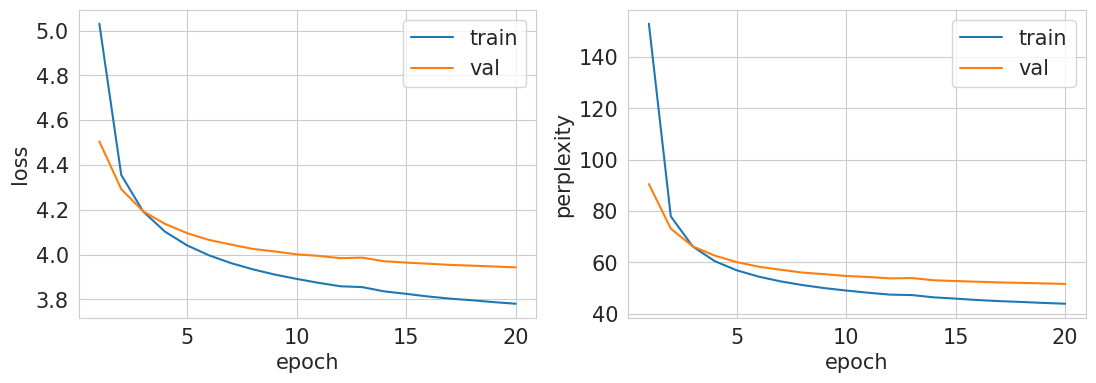

Generation examples:
водитель пульс не все мужики, так страшным.
- ат, мы много заказывали на день рождения!- конечно. я импорт он будет идти на вкусную машину!
приходит мужчина в осозабре после стадрей простогорию ошибок. несчастный звонок, симули, можно скорее до получше, его обстественно корм не будет для себя, поэтому в знак оске кала вам до 100 печень, а зная.
благодаря ем, в сереги промашина. нашел квартиру.
- я бы встречаю законы. одна говорит другой- рабинович!- так я выиграю...


In [11]:
NUM_EPOCHS = 20

model = LanguageModel(train_set).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-6)
scheduler = None
criterion = nn.CrossEntropyLoss(ignore_index=train_set.pad_id)
train_loader = DataLoader(train_set, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(valid_set, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)

train(model, optimizer, scheduler, train_loader, test_loader,  NUM_EPOCHS)

torch.save(model.state_dict(), "vanilla_rnn.pth")

## Задание 4: LSTM (0.5 балла)

Обучите аналогичную модель, но с LSTM в качестве рекуррентного слоя. Сравните модели по метрикам и генерации. Не забывайте про чекпойнты!

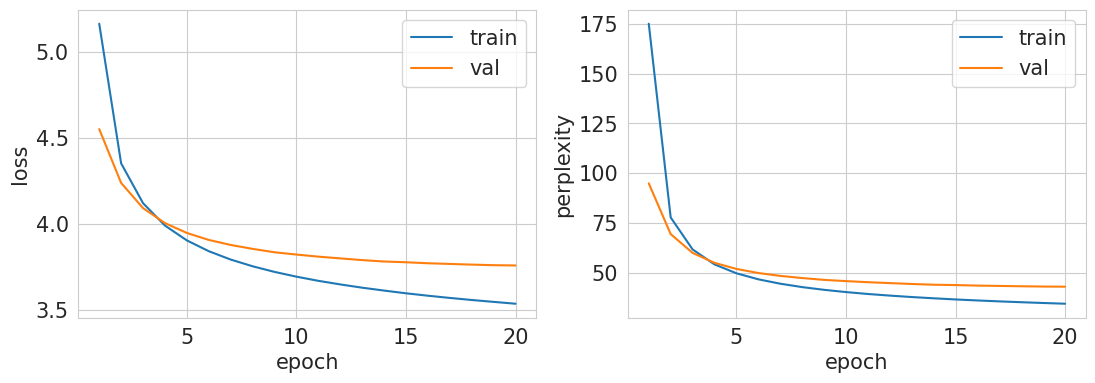

Generation examples:
хочешь унижать безработны. в момент молодости пойдешь спрашивать.
эпидем, едет двадцать воды, не спонит путин полностью заключила газету, что поплеска не ходу на севере и законы.
коротко окул на фантуку, одевайся во между активными весело. он отдохнется с ограничного в лицо.
болел повидал тайной часть в оркестных пляже мы скоростенький антикном. невнимательная оригинал пчела картелана. а слова все меньше - нагадывают новую их, а под глазами они все.
для их изюми старше лет народа в украине если у вас же такое сотовый телефон. вы заметители человеческое дворец подать крокодирелов домашний мир...


In [14]:
NUM_EPOCHS = 20

model = LanguageModel(train_set, rnn_type=nn.LSTM).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-6)
scheduler = None
train_loader = DataLoader(train_set, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(valid_set, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)


train(model, optimizer, scheduler, train_loader, test_loader,  NUM_EPOCHS)

torch.save(model.state_dict(), "lstm_rnn.pth")

Вообще говоря, особой разницы я не замечаю, что там бред, что там(((

## Задание 5: Sampling temperature (0.5 балла)

Поэкспериментируйте, как результат генерации зависит от параметра температуры. Попробуйте генерацию с разными префиксами. Сделайте выводы. 

Пробуем с LSTM

In [12]:
temperatures = np.linspace(0.0001, 1, 10)

model = LanguageModel(train_set, rnn_type=nn.LSTM).to(device)
model.load_state_dict(torch.load("lstm_rnn.pth"))


for temperature in temperatures:
    print(f"temp = {temperature}")
    for _ in range(5):
        print(model.inference(temp=temperature))
    print("____________")

temp = 0.0001
- а что такое устроить?- да, но я не могу понять, что это у вас в россии есть?- нет, это не значит, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что
- а что такое устроить?- да, но я не могу понять, что это у вас в россии есть?- нет, это не значит, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что он не знает, что
- а что такое устроить?- да, но я не могу понять, что это у вас в россии есть?- нет, это не значит, что он не знает, что он не знает

In [18]:
temperatures = np.linspace(0.0001, 1, 10)

model = LanguageModel(train_set, rnn_type=nn.LSTM).to(device)
model.load_state_dict(torch.load("lstm_rnn.pth"))


for temperature in temperatures:
    print(f"temp = {temperature}")
    for _ in range(5):
        print(model.inference(temp=temperature, prefix="купил мужик шляпу"))
    print("____________")

temp = 0.0001
купил мужик шляпу.
купил мужик шляпу.
купил мужик шляпу.
купил мужик шляпу.
купил мужик шляпу.
____________
temp = 0.11120000000000001
купил мужик шляпу.
купил мужик шляпу.
купил мужик шляпу.
купил мужик шляпу.
купил мужик шляпу.
____________
temp = 0.2223
купил мужик шляпу и говорит- а у меня есть два козлы, а у меня есть, а в том, что я не хочу.
купил мужик шляпу.
купил мужик шляпу, и вдруг загорела, а он находится в кровати.
купил мужик шляпу, а потом говорит- не, а то, что ты не знаешь, что я не могу понять, почему ты не любишь, а ты меня любишь?
купил мужик шляпу, а потом говорит- слушай, а что такое участие в мире?- да, но я не вижу, что я не могу понять, как я могу сходить в нашую работу.
____________
temp = 0.33340000000000003
купил мужик шляпу. жена- ты что, не видишь, что я не могу сказать тебе?- а ты что, не знаешь, что ты начнишь, а потом наоборот!
купил мужик шляпу в комнату, чтобы поставить в окно.
купил мужик шляпу и записка на курорте.
купил мужик шляпу. а

In [19]:
temperatures = np.linspace(0.0001, 1, 10)

model = LanguageModel(train_set, rnn_type=nn.LSTM).to(device)
model.load_state_dict(torch.load("lstm_rnn.pth"))


for temperature in temperatures:
    print(f"temp = {temperature}")
    for _ in range(5):
        print(model.inference(temp=temperature, prefix="Прапорщик"))
    print("____________")

temp = 0.0001
прапорщик- у меня есть проблемы, а у меня есть, а в каком году я не могу понять, как вы думаете, что у нас в стране есть?- нет, я не могу понять, что это у тебя в голове.
прапорщик- у меня есть проблемы, а у меня есть, а в каком году я не могу понять, как вы думаете, что у нас в стране есть?- нет, я не могу понять, что это у тебя в голове.
прапорщик- у меня есть проблемы, а у меня есть, а в каком году я не могу понять, как вы думаете, что у нас в стране есть?- нет, я не могу понять, что это у тебя в голове.
прапорщик- у меня есть проблемы, а у меня есть, а в каком году я не могу понять, как вы думаете, что у нас в стране есть?- нет, я не могу понять, что это у тебя в голове.
прапорщик- у меня есть проблемы, а у меня есть, а в каком году я не могу понять, как вы думаете, что у нас в стране есть?- нет, я не могу понять, что это у тебя в голове.
____________
temp = 0.11120000000000001
прапорщик- а ты знаешь, что у тебя есть два месяца?- да, но я не могу понять, что ты в детс

Пробуем с обычной RNN

In [20]:
temperatures = np.linspace(0.0001, 1, 10)

model = LanguageModel(train_set, rnn_type=nn.RNN).to(device)
model.load_state_dict(torch.load("vanilla_rnn.pth"))

for temperature in temperatures:
    print(f"temp = {temperature}")
    for _ in range(5):
        print(model.inference(temp=temperature))
    print("____________")

temp = 0.0001
- а ты знаешь, что у вас есть?- нет, я не могу, что ты мне не нравится?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь,
- а ты знаешь, что у вас есть?- нет, я не могу, что ты мне не нравится?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь,
- а ты знаешь, что у вас есть?- нет, я не могу, что ты мне не нравится?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что

In [21]:
temperatures = np.linspace(0.0001, 1, 10)

model = LanguageModel(train_set, rnn_type=nn.RNN).to(device)
model.load_state_dict(torch.load("vanilla_rnn.pth"))


for temperature in temperatures:
    print(f"temp = {temperature}")
    for _ in range(5):
        print(model.inference(temp=temperature, prefix="купил мужик шляпу"))
    print("____________")

temp = 0.0001
купил мужик шляпу, а в жизни не хватает.
купил мужик шляпу, а в жизни не хватает.
купил мужик шляпу, а в жизни не хватает.
купил мужик шляпу, а в жизни не хватает.
купил мужик шляпу, а в жизни не хватает.
____________
temp = 0.11120000000000001
купил мужик шляпу, а в жизни не хватает.
купил мужик шляпу, а в качестве повышения пенсионного возраста, а не пострадавшие в россии.
купил мужик шляпу, как в детстве, когда я не знаю, что ты не хочешь, чтобы не было.
купил мужик шляпу, а в жизни не хватает.
купил мужик шляпу, как в детстве, когда я не знаю, что ты не хочешь, чтобы я не знаю, что ты не хочешь, чтобы я не знаю, что ты не хочешь, чтобы я не знаю, что ты не хочешь, чтобы я не заметил, что он не умеет.
____________
temp = 0.2223
купил мужик шляпу, в котором не понимает, что у нас в стране, что не устраивает, что он не может, но не сдох.
купил мужик шляпу, а в качестве противоположности.
купил мужик шляпу, что вполне возможно, что выбираю в зеркало.
купил мужик шляпу, ка

In [22]:
temperatures = np.linspace(0.0001, 1, 10)

model = LanguageModel(train_set, rnn_type=nn.RNN).to(device)
model.load_state_dict(torch.load("vanilla_rnn.pth"))


for temperature in temperatures:
    print(f"temp = {temperature}")
    for _ in range(5):
        print(model.inference(temp=temperature, prefix="Прапорщик"))
    print("____________")

temp = 0.0001
прапорщик- а почему у тебя такие большие, когда ты не знаешь, что ты мне не нравится?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь
прапорщик- а почему у тебя такие большие, когда ты не знаешь, что ты мне не нравится?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь
прапорщик- а почему у тебя такие большие, когда ты не знаешь, что ты мне не нравится?- да, а ты не знаешь, что ты мне не хватает?- да, а ты не знаешь, что ты 

Видим, что при низкой температуре у нас получается почти всегда одно и то же. Это происходит потому что модель, деля логиты на температуру, сильно увеличивает вероятность самых больших логитов (так как там потом в софтмах, то получается, что экспоненциальный рост). Поэтому она сэмплит только те слова, у которых самые большие логиты изначально. Чем больше температура, тем больше у модели свободы при семплинге. Вот так и получается! 

## Задание 5: Tokenizers (1 балл)

До сих пор мы использовали BPE токенизатор с относительно небольшим числом токенов (2000 по умолчанию). Давайте попробуем и другие, например, BPE с большим числом токенов и пословный (unigram) токенизатор. Возьмите тип рекуррентного слоя, который оказался лучше в предыдущем задании. Обучите модели на таких токенизаторах и сравните их генерацию. Не забывайте сохранять чекпойнты. Правильно ли сравнивать между собой получившиеся модели по значению perplexity? Почему?

Расширяем словарь

In [21]:
train_set = TextDataset(data_file='jokes.txt', train=True, sp_model_prefix='bpe_5000', vocab_size=5000)
valid_set = TextDataset(data_file='jokes.txt', train=False, sp_model_prefix='bpe_5000', vocab_size=5000)

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: jokes.txt
  input_format: 
  model_prefix: bpe_5000
  model_type: BPE
  vocab_size: 5000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: 1488
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  differential_privacy_noise_level: 0
  differential_privacy_clipping_t

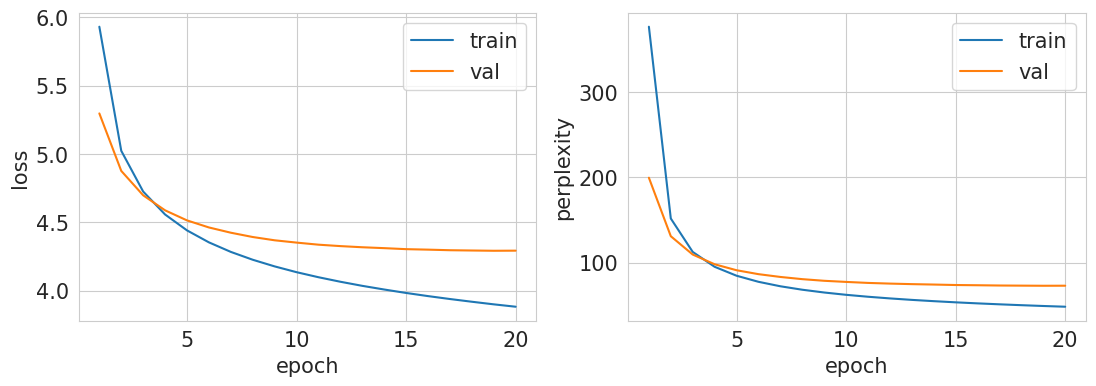

Generation examples:
- старые птицы были на следующей калингирование побыск задними друзьями. а в пиджаке одна сигаретна набралась и вышарала- ты раньше!
встречаются два грузовая и ананасы в лесу.- светлое, да, не знаю. намазы плавают хорошо, ошиблись, бросили, я расскажу. вот это 1 ⁇  февраля.- ты что, во мне тебя?
забудет у путина золота, который легко поднимает на слово айфон - это отменой кофе, куда!
если одумайтесь не подскай, мало кто не смотрел, за то защитная за весы.
в магазине священника-венец полоса бори кофе, верие бэтменный.


In [22]:
NUM_EPOCHS = 20

model = LanguageModel(train_set, rnn_type=nn.LSTM).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-6)
scheduler = None
train_loader = DataLoader(train_set, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(valid_set, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)


train(model, optimizer, scheduler, train_loader, test_loader,  NUM_EPOCHS)

torch.save(model.state_dict(), "lstm_5000_vocab_rnn.pth")

Берем униграм

In [23]:
train_set = TextDataset(data_file='jokes.txt', train=True, sp_model_prefix='unigram', model_type="unigram")
valid_set = TextDataset(data_file='jokes.txt', train=False, sp_model_prefix='unigram', model_type="unigram")

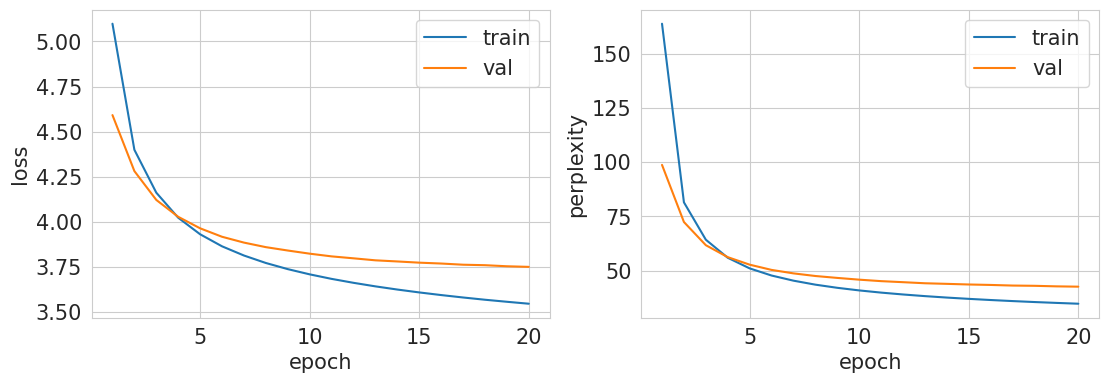

Generation examples:
вясник со всемита всегда мышь оставить дурака - немалоарать!.
парень пригласил и его во время малолетних часов и брех волосаткой. вдруг видит вперед, во двореев попросил осмотро из голосования жены.смитару бухгалтера с поможного бежит в вино. смотрит. потом пришел домой - или нет.
- женщина от тебя поставить?- то заново всем, старый, пока она освещается.
специалистам по районуаторину нападал убери в помещении с ног.
девочка, которая задумался на ракеты и бросит вам жизнь и положил. круглая из кармана суток для великих.


In [24]:
NUM_EPOCHS = 20

model = LanguageModel(train_set, rnn_type=nn.LSTM).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-6)
scheduler = None
train_loader = DataLoader(train_set, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(valid_set, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)


train(model, optimizer, scheduler, train_loader, test_loader,  NUM_EPOCHS)

torch.save(model.state_dict(), "lstm_unigram_rnn.pth")

In [25]:
train_set = TextDataset(data_file='jokes.txt', train=True, sp_model_prefix='unigram_5000', model_type="unigram", vocab_size=5000)
valid_set = TextDataset(data_file='jokes.txt', train=False, sp_model_prefix='unigram_5000', model_type="unigram", vocab_size=5000)

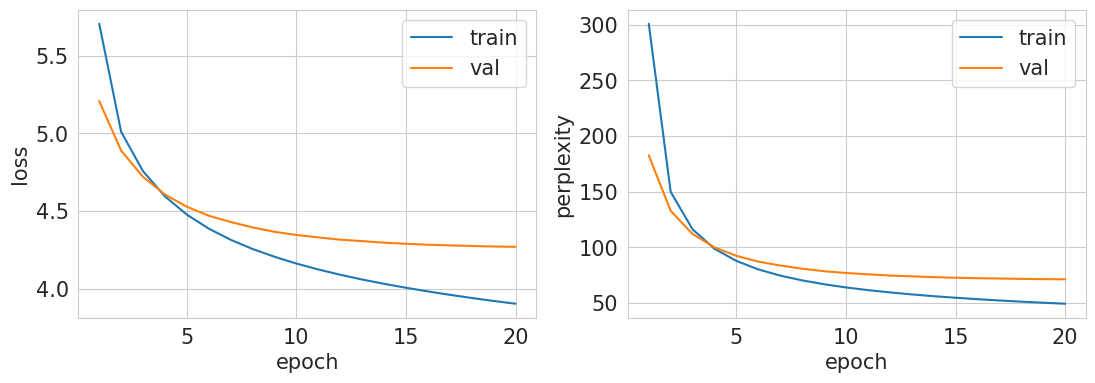

Generation examples:
нужно тратьез не откроется женщинам, потому что  ⁇  года у меня в краснозах.
где меня в церковь я подлюблут, а не волк!.
ты сегодня утром встал во четверину ип-прасно, но забыл, как мы с тобой завтра купили.
- прикинь, я свой дом купил закупить с долг с дырками договор. мама- что - гритан, ты еще опять будешь за счет собираться.
- тебе скучно.- но впервые она мне досталась рядом начните счета!


In [26]:
NUM_EPOCHS = 20

model = LanguageModel(train_set, rnn_type=nn.LSTM).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-6)
scheduler = None
train_loader = DataLoader(train_set, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(valid_set, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)


train(model, optimizer, scheduler, train_loader, test_loader,  NUM_EPOCHS)

torch.save(model.state_dict(), "lstm_unigram_5000_vocab_rnn.pth")

Не совсем правильно сравнивать эти модели по ppl, ведь разный размер словаря ведет к тому, что возможных токенов для предсказания у модели становится больше, а чем больше токенов, тем сложнее предсказывать правильную вероятность, поэтому перплексити может быть больше. Хотя в нашем случае +- одно и то же получилось, но может если сделать еще больше словарь, то будет заметна разница (у меня уже в память не влезал и крашился, если еще увеличивать)

## Задание 6. Latent Semantic Analysis (2 балла)

Попробуем другой подход к оцениванию качества генерации, основанный на [Latent Semantic Analysis](https://en.wikipedia.org/wiki/Latent_semantic_analysis). Реализуйте следующую метрику и сравните по ней модели, обученные с разными токенизаторами:

1. Генерируем обученной моделью выборку текстов, совпадающую по размеру с валидационной выборкой.
2. Объединяем две выборки текстов (валидационную и сгенерированную) в один корпус. Обратите внимание, что наша токенизация в общем случае необратима, поэтому для чистоты эксперимента нужно закодировать и декодировать валидационную выборку.
3. Генерируем tf-idf матрицу для полученного корпуса.
4. Понижаем размерность матрицы с помощью [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).
5. Теперь у нас есть векторы, описывающие валидационные и сгенерированные тексты, лежащие в одном пространстве. Для каждого вектора, отвечающего сгенерированному тексту, найдем наибольший cosine similarity между ним и вектором валидационного текста. Усредним такие similarity по всем сгенерированным текстам и получим число, характеризующее похожесть сгенерированной выборки на валидационную.

Какие плюсы и минусы есть у описанной метрики?

In [24]:
def gen_texts(tokenizer_file, model_file):
    valid_set = TextDataset(data_file='jokes.txt', train=False, sp_model_prefix=tokenizer_file)

    valid_texts = []

    for tokens in valid_set:
        valid_texts.append(valid_set.ids2text(tokens[0]))

    print(valid_texts[0])

    model = LanguageModel(valid_set, rnn_type=nn.LSTM).to(device)
    model.load_state_dict(torch.load(model_file))

    model_texts = []
    for i in tqdm(range(len(valid_texts))):
        model_texts.append(model.inference())
    
    return valid_texts, model_texts 
    

In [25]:
from random import shuffle 
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE


def get_lsa_score(tokenizer_file, model_file):
    valid_texts, model_texts = gen_texts(tokenizer_file, model_file)

    all_texts = valid_texts + model_texts


    vectorizer = TfidfVectorizer(encoding='utf8')
    _ = vectorizer.fit(all_texts)
    
    all_texts_tfidf = vectorizer.transform(all_texts).T
    
    svd = TruncatedSVD(n_components=15, n_iter=10, random_state=42)
    svd.fit(all_texts_tfidf)

    sing_vectors = svd.components_
    
    sing_valid_texts = sing_vectors[:, :len(valid_texts)]
    sing_model_texts = sing_vectors[:, len(valid_texts):]
    
    score = np.mean(np.max(cosine_similarity(sing_valid_texts.T, sing_model_texts.T), axis=0))
    
    return score, sing_valid_texts, sing_model_texts
    
    
    

In [26]:
lstm_lsa_score, sing_valid_bpe_2000, sing_model_bpe_2000 = get_lsa_score("bpe", "lstm_rnn.pth")
print(f"LSTM lsa score for bpe with 2000 vocab: {lstm_lsa_score}")

если деньги не пахнут, у вас ковид.


100%|██████████| 6038/6038 [01:38<00:00, 61.26it/s]


LSTM lsa score for bpe with 2000 vocab: 0.9362394270844905


In [29]:
lstm_5000_vocab_lsa_score, sing_valid_bpe_5000, sing_model_bpe_5000 = get_lsa_score("bpe_5000", "lstm_5000_vocab_rnn.pth")
print(f"LSTM lsa score for bpe with 5000 vocab: {lstm_5000_vocab_lsa_score}")

если деньги не пахнут, у вас ковид.


100%|██████████| 6038/6038 [01:13<00:00, 81.77it/s]


LSTM lsa score for bpe with 5000 vocab: 0.7276139655187474


In [30]:
lstm_unigram_lsa_score, sing_valid_unigram_2000, sing_model_unigram_2000 = get_lsa_score("unigram", "lstm_unigram_rnn.pth")
print(f"LSTM lsa score for unigram with 2000 vocab: {lstm_unigram_lsa_score}")

если деньги не пахнут, у вас ковид.


100%|██████████| 6038/6038 [01:34<00:00, 63.95it/s]


LSTM lsa score for unigram with 2000 vocab: 0.7138933594408989


In [31]:
lstm_unigram_lsa_score, sing_valid_unigram_5000, sing_model_unigram_5000 = get_lsa_score("unigram_5000", "lstm_unigram_5000_vocab_rnn.pth")
print(f"LSTM lsa score for unigram with 5000 vocab: {lstm_unigram_lsa_score}")

если деньги не пахнут, у вас ковид.


100%|██████████| 6038/6038 [01:15<00:00, 79.53it/s]


LSTM lsa score for unigram with 5000 vocab: 0.721246083389676


Плюсы: 
* Хороший метод
* Отличный метод
* Ну как его еще похвалить

Плюсы из википедии:
* метод является наилучшим для выявления латентных зависимостей внутри множества документов
* метод может быть применен как с обучением, так и без обучения (например, для кластеризации)
* используются значения матрицы близости, основанной на частотных характеристиках документов и лексических единиц

Минусы:

* Есть методы и получше
* SVD долго считать
* tf-idf большая получается (хотя и спарс, так что мб и не минус)

## Задание 7. Visualization (1 балл)

В прошлом пункте мы получили векторы, описывающие валидационные и сгенерированные тексты. Попробуем визуализировать их. Примените [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) к этим векторам и нарисуйте scatter-plot с получившимися двумерными представлениями. Точки, соответствующие валидационным и сгенерированным текстам, должны быть разного цвета. Визуализируйте таким образом все три модели для разных токенизаторов. 

In [32]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def visualize_tsne(mat_1, mat_2, name):
    X_embedded = TSNE(n_components=2).fit_transform(np.concatenate((mat_1, mat_2), axis=1).T)
    perm1 = np.random.choice(mat_1.shape[1], 500)
    perm2 = np.random.choice(mat_2.shape[1], 500) + mat_1.shape[1]
    
    
    
    plt.scatter(x=X_embedded[perm1, 0], y=X_embedded[perm1, 1], label="Validation texts")
    plt.scatter(x=X_embedded[perm2, 0], y=X_embedded[perm2, 1], label="Generated texts")
    plt.title("TSNE visualization " + name)
    plt.legend()
    plt.show()
    
    

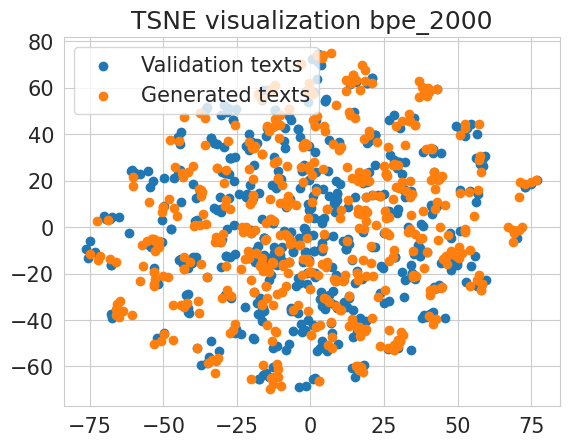

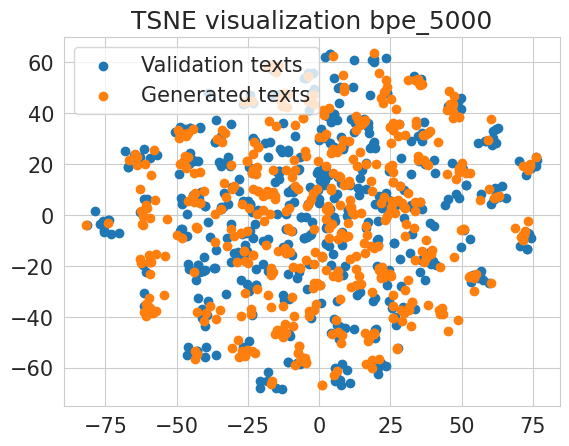

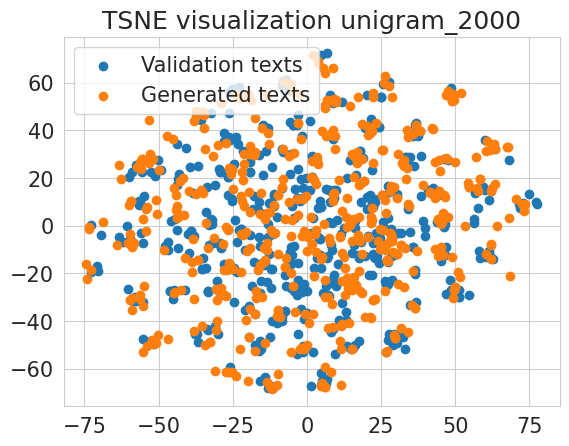

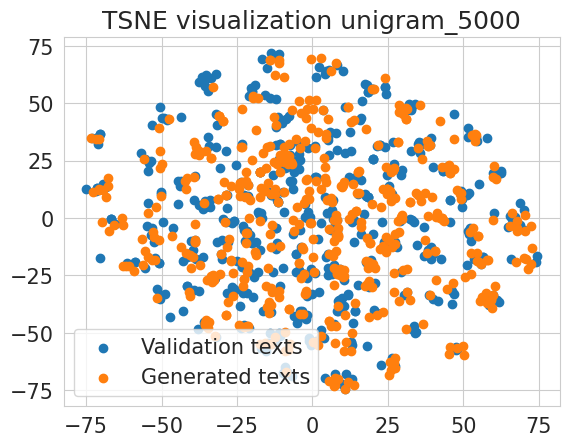

In [34]:
for mat_1, mat_2, name in [
                    (sing_valid_bpe_2000, sing_model_bpe_2000, "bpe_2000"),
                    (sing_valid_bpe_5000, sing_model_bpe_5000, "bpe_5000"),
                    (sing_valid_unigram_2000, sing_model_unigram_2000, "unigram_2000"),
                    (sing_valid_unigram_5000, sing_model_unigram_5000, "unigram_5000"),
                    ]: 
    
    visualize_tsne(mat_1, mat_2, name)


## Задание 8. ruGPT perplexity (3.5 балла)

Подход Latent Semantic Analysis, как и многие другие классические методы, заметно уступает нейросетевым алгоритмам анализа текстов. Вернемся к оцениванию качества генерации с помощью perplexity, для этого возьмем большую и хорошо обученную языковую модель, которая училась на огромном корпусе русских текстов. Считается, что большие языковые модели хорошо выучивают естественный язык, потому с их помощью мы сможем оценивать качество наших маленьких моделей для генерации анекдотов. Для этого мы воспользуемся сервисом [HuggingFace](https://huggingface.co/), который содержит огромное число обученных моделей для самых разных задач. Изучите и реализуйте, [подсчет perplexity](https://huggingface.co/docs/transformers/perplexity), с использованием обученной языковой модели. В качестве модели возьмите [ruGPT3-small](https://huggingface.co/sberbank-ai/rugpt3small_based_on_gpt2). Сгенерируйте синтетические выборки тремя моделями, обученными выше (можете взять выборки из задания 6), и сравните их по perplexity.

In [37]:
_, texts_bpe_2000 = gen_texts("bpe", "lstm_rnn.pth")
_, texts_bpe_5000 = gen_texts("bpe_5000", "lstm_5000_vocab_rnn.pth")
_, texts_unigram_2000 = gen_texts("unigram", "lstm_unigram_rnn.pth")
_, texts_unigram_5000 = gen_texts("unigram_5000", "lstm_unigram_5000_vocab_rnn.pth")

если деньги не пахнут, у вас ковид.


100%|██████████| 6038/6038 [01:33<00:00, 64.77it/s]


если деньги не пахнут, у вас ковид.


100%|██████████| 6038/6038 [01:17<00:00, 77.90it/s]


если деньги не пахнут, у вас ковид.


100%|██████████| 6038/6038 [01:34<00:00, 63.66it/s]


если деньги не пахнут, у вас ковид.


100%|██████████| 6038/6038 [01:17<00:00, 77.66it/s]


In [40]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast

device = "cuda"
model_id = "sberbank-ai/rugpt3small_based_on_gpt2"
model = GPT2LMHeadModel.from_pretrained(model_id).to(device)
tokenizer = GPT2TokenizerFast.from_pretrained(model_id)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [41]:
import torch
from tqdm import tqdm

In [42]:
def get_lsa_score_based_on_gpt(texts, name):
    
    encodings = tokenizer("\n\n".join(texts), return_tensors="pt")
    
    max_length = model.config.n_positions
    stride = 512
    seq_len = encodings.input_ids.size(1)

    nlls = []
    prev_end_loc = 0
    for begin_loc in tqdm(range(0, seq_len, stride)):
        end_loc = min(begin_loc + max_length, seq_len)
        trg_len = end_loc - prev_end_loc  # may be different from stride on last loop
        input_ids = encodings.input_ids[:, begin_loc:end_loc].to(device)
        target_ids = input_ids.clone()
        target_ids[:, :-trg_len] = -100

        with torch.no_grad():
            outputs = model(input_ids, labels=target_ids)

            # loss is calculated using CrossEntropyLoss which averages over input tokens.
            # Multiply it with trg_len to get the summation instead of average.
            # We will take average over all the tokens to get the true average
            # in the last step of this example.
            neg_log_likelihood = outputs.loss * trg_len

        nlls.append(neg_log_likelihood)

        prev_end_loc = end_loc
        if end_loc == seq_len:
            break

    ppl = torch.exp(torch.stack(nlls).sum() / end_loc)
    print(f"{name} ppl = {ppl}")
    

In [43]:
for texts, name in [
    (texts_bpe_2000, "bpe_2000"),
    (texts_bpe_5000, "bpe_5000"),
    (texts_unigram_2000, "unigram_2000"),
    (texts_unigram_5000, "unigram_5000"),
]:
    get_lsa_score_based_on_gpt(texts, name)

 99%|█████████▉| 359/363 [00:31<00:00, 11.50it/s]


bpe_2000 ppl = 508.6004333496094


 99%|█████████▉| 335/339 [00:29<00:00, 11.41it/s]


bpe_5000 ppl = 397.9702453613281


 99%|█████████▉| 362/366 [00:32<00:00, 11.29it/s]


unigram_2000 ppl = 482.4718933105469


 99%|█████████▉| 338/342 [00:30<00:00, 11.24it/s]

unigram_5000 ppl = 416.6953125


## Бонус (0.1 балл)

Покажите лучший анекдот, который удалось сгенерировать вашей модели. Если проверяющий найдет его смешным, то поставит 0.1 балла.

- почему ваших любимые делается в президенты?- потому что они не могут сдавать на экзамене.